In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\tiles\Downloads\Housing.csv")

In [3]:
df.head(5)

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000


In [4]:
df.columns

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'OWNERSHPD', 'COSTELEC', 'COSTGAS',
       'COSTWATR', 'COSTFUEL', 'HHINCOME', 'VALUEH', 'ROOMS', 'BUILTYR2',
       'BEDROOMS', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'PERNUM', 'PERWT', 'AGE',
       'MARST', 'BIRTHYR', 'EDUC', 'EDUCD', 'INCTOT'],
      dtype='object')

In [5]:
df = df.loc[df.groupby('SERIAL')['AGE'].idxmax()]

In [6]:
print(df.reset_index(drop=True))

        SERIAL  DENSITY  OWNERSHP  OWNERSHPD  COSTELEC  COSTGAS  COSTWATR  \
0      1371772    920.0         1         13      9990     9993       360   
1      1371773   3640.9         2         22      1080     9993      1800   
2      1371774     22.5         1         13       600     9993      9993   
3      1371775   3710.4         2         22      3600     9993      9997   
4      1371776    448.2         1         12      1560     3000      9993   
...        ...      ...       ...        ...       ...      ...       ...   
30797  1402569    362.4         1         13      1200     9993       500   
30798  1402570    667.7         1         12       600     1200       750   
30799  1402571   2425.1         1         13      2400      600      1400   
30800  1402572   2295.9         1         13      1200     9992      1600   
30801  1402573   2754.9         2         22      9990     7200       960   

       COSTFUEL  HHINCOME   VALUEH  ...  NFAMS  NCOUPLES  PERNUM  PERWT  AG

In [7]:
df.drop(['SERIAL', 'OWNERSHPD', 'VALUEH','PERNUM', 'PERWT', 'BIRTHYR', 'EDUCD', 'INCTOT','COSTELEC','COSTGAS','COSTWATR','COSTFUEL','BUILTYR2'], axis=1, inplace=True)

In [8]:
df.columns

Index(['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BEDROOMS', 'VEHICLES',
       'NFAMS', 'NCOUPLES', 'AGE', 'MARST', 'EDUC'],
      dtype='object')

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'DENSITY': [  920.   3640.9    22.5  3710.4   448.2   155.4  5962.1   230.4   362.4
    96.8  4031.9  4084.5   150.3   765.8  5339.8  3919.8   132.1  2156.8
  4291.1    66.2   473.8  3558.4  2754.9   665.1   237.8  4071.2 13284.6
  1758.5   222.9  8710.1   667.7  1927.8  8944.    779.2  4501.4  1411.3
  2543.5  3376.5  3248.8  4560.6  1366.5  8784.4  2425.1   548.4  2746.3
  3843.3  2295.9   217.4  1667.9  4677.1  2493.3   529.2  1607.   2288.1
  4161.6   280.3]
Unique values in column 'OWNERSHP': [1 2]
Unique values in column 'HHINCOME': [ 75000  13600   7000 ...  24120 284700  10310]
Unique values in column 'ROOMS': [ 7  6  5  4  1  3 10  8  9 12 17  2 11 13 14]
Unique values in column 'BEDROOMS': [4 3 5 1 6 8 2]
Unique values in column 'VEHICLES': [2 3 1 9 4 5 6]
Unique values in column 'NFAMS': [ 1  2  6  3  4  5  8  7 13 10]
Unique values in column 'NCOUPLES': [0 1 2 3]
Unique values in column 'AGE': [52 22 62 50 93 61 45 26 74 40 41 28 37 71 67 73 81 65 53

In [10]:
df.shape

(30802, 11)

In [11]:
def reassign_density(value):
    if value < 2000:
        return 1
    elif 2000 <= value <= 4000:
        return 2
    else:
        return 3

df['DENSITY'] = df['DENSITY'].apply(reassign_density)

In [12]:
def reassign_income(value):
    if value < 100000:
        return 1
    elif 100001 <= value <= 250000:
        return 2
    else:
        return 3

df['HHINCOME'] = df['HHINCOME'].apply(reassign_income)

In [13]:
def reassign_vehicles(value):
    if value == 9:
        return 0
    else:
        return value

df['VEHICLES'] = df['VEHICLES'].apply(reassign_vehicles)

In [14]:
df['isMarried'] = 0
df['isDivorced'] = 0
df['isNeverMarried'] = 0

df.loc[df['MARST'].isin([1, 2]), 'isMarried'] = 1
df.loc[df['MARST'].isin([3, 4, 5]), 'isDivorced'] = 1
df.loc[df['MARST'] == 6, 'isNeverMarried'] = 1

df.drop('MARST', axis=1, inplace=True)


In [15]:
df['NoSchooling'] = 0
df['PrimarySchooling'] = 0
df['Schooling'] = 0
df['College'] = 0

df.loc[df['EDUC'] == 0, 'NoSchooling'] = 1
df.loc[df['EDUC'] == 1, 'PrimarySchooling'] = 1
df.loc[df['EDUC'].between(2, 6), 'Schooling'] = 1
df.loc[df['EDUC'] >= 7, 'College'] = 1

df.drop('EDUC', axis=1, inplace=True)

#### Linear Kernel

In [16]:
df.columns

Index(['DENSITY', 'OWNERSHP', 'HHINCOME', 'ROOMS', 'BEDROOMS', 'VEHICLES',
       'NFAMS', 'NCOUPLES', 'AGE', 'isMarried', 'isDivorced', 'isNeverMarried',
       'NoSchooling', 'PrimarySchooling', 'Schooling', 'College'],
      dtype='object')

In [17]:
columns_to_keep = ['OWNERSHP', 'HHINCOME', 'BEDROOMS', 'VEHICLES', 'isMarried', 'Schooling']
df_linear = df[columns_to_keep]
df_linear.columns

Index(['OWNERSHP', 'HHINCOME', 'BEDROOMS', 'VEHICLES', 'isMarried',
       'Schooling'],
      dtype='object')

In [18]:
X = df_linear.drop('OWNERSHP', axis=1)
y = df_linear['OWNERSHP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
svc_linear = SVC(kernel="linear", C=0.1)
svc_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [20]:
nsv = svc_linear.n_support_.sum()
print("Number of support vectors:", nsv)

Number of support vectors: 10438


In [21]:
y_train_pred = svc_linear.predict(X_train)
y_test_pred = svc_linear.predict(X_test)

In [22]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_error_rate = 1 - train_accuracy
test_error_rate = 1 - test_accuracy

In [23]:
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training error rate:", train_error_rate)
print("Testing error rate:", test_error_rate)

Training accuracy: 0.7851212837994527
Testing accuracy: 0.7837896331565848
Training error rate: 0.21487871620054733
Testing error rate: 0.2162103668434152


##### Cross Validation

In [24]:
param_grid = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear']
}
svc_linear_cv = SVC()
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=svc_linear_cv, param_grid=param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10], 'kernel': ['linear']})

In [25]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'kernel': 'linear'}


In [26]:
best_svc_linear = grid_search.best_estimator_
y_train_pred_cv = best_svc_linear.predict(X_train)
y_test_pred_cv = best_svc_linear.predict(X_test)

In [27]:
train_accuracy_cv = accuracy_score(y_train, y_train_pred_cv)
test_accuracy_cv = accuracy_score(y_test, y_test_pred_cv)

In [28]:
train_error_rate_cv = 1 - train_accuracy_cv
test_error_rate_cv = 1 - test_accuracy_cv

In [29]:
print("Training accuracy (CV):", train_accuracy_cv)
print("Testing accuracy (CV):", test_accuracy_cv)
print("Training error rate (CV):", train_error_rate_cv)
print("Testing error rate (CV):", test_error_rate_cv)

Training accuracy (CV): 0.7883678864616669
Testing accuracy (CV): 0.7828157125852181
Training error rate (CV): 0.2116321135383331
Testing error rate (CV): 0.2171842874147819


In [30]:
coefficients = best_svc_linear.coef_
importance_scores = abs(coefficients)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance Score': importance_scores[0]})
importance_df = importance_df.sort_values(by='Importance Score', ascending=False)
print(importance_df)

     Feature  Importance Score
1   BEDROOMS      9.998483e-01
2   VEHICLES      1.680238e-04
0   HHINCOME      6.300291e-05
4  Schooling      4.279222e-06
3  isMarried      1.136868e-13


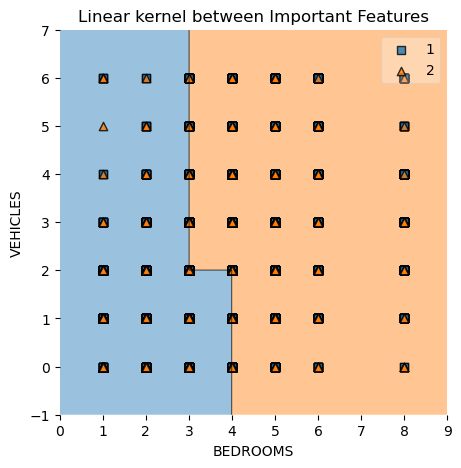

In [31]:
from mlxtend.plotting import plot_decision_regions

features = importance_df.iloc[:2]['Feature'].tolist()
best_svc_linear.fit(X_train[features], y_train)
fig, ax = plt.subplots(figsize=(5, 5))
plot_decision_regions(X_train[features].values, y_train.values, clf=best_svc_linear, ax=ax)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Linear kernel between Important Features')
plt.show()


#### RBF

In [61]:
columns_to_keep = ['OWNERSHP', 'DENSITY', 'ROOMS', 'AGE', 'isNeverMarried', 'College']
df_rbf = df[columns_to_keep]
df_rbf.columns

Index(['OWNERSHP', 'DENSITY', 'ROOMS', 'AGE', 'isNeverMarried', 'College'], dtype='object')

In [62]:
X = df_rbf.drop('OWNERSHP', axis=1)
y = df_rbf['OWNERSHP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
svc_rbf = SVC(kernel="rbf", C=1, gamma=0.1)
svc_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [35]:
nsv = svc_rbf.n_support_.sum()
print("Number of support vectors:", nsv)

Number of support vectors: 9786


In [36]:
y_train_pred = svc_rbf.predict(X_train)
y_test_pred = svc_rbf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_error_rate = 1 - train_accuracy
test_error_rate = 1 - test_accuracy

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training error rate:", train_error_rate)
print("Testing error rate:", test_error_rate)

Training accuracy: 0.8131812068085896
Testing accuracy: 0.8114922627421275
Training error rate: 0.18681879319141037
Testing error rate: 0.1885077372578725


##### Cross Validation

In [37]:
param_grid = {
    'C': [1, 5, 10],
    'gamma': [1, 5, 10],
    'kernel': ['rbf']
}

svc_rbf_cv = SVC()
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
grid_search_rbf = GridSearchCV(estimator=svc_rbf_cv, param_grid=param_grid, cv=kfold)
grid_search_rbf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'gamma': [1, 5, 10],
                         'kernel': ['rbf']})

In [38]:
print("Best parameters (RBF):", grid_search_rbf.best_params_)

Best parameters (RBF): {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [39]:
best_svc_rbf = grid_search_rbf.best_estimator_
y_train_pred_rbf_cv = best_svc_rbf.predict(X_train)
y_test_pred_rbf_cv = best_svc_rbf.predict(X_test)

In [40]:
train_accuracy_rbf_cv = accuracy_score(y_train, y_train_pred_rbf_cv)
test_accuracy_rbf_cv = accuracy_score(y_test, y_test_pred_rbf_cv)

train_error_rate_rbf_cv = 1 - train_accuracy_rbf_cv
test_error_rate_rbf_cv = 1 - test_accuracy_rbf_cv

print("Training accuracy (RBF, CV):", train_accuracy_rbf_cv)
print("Testing accuracy (RBF, CV):", test_accuracy_rbf_cv)
print("Training error rate (RBF, CV):", train_error_rate_rbf_cv)
print("Testing error rate (RBF, CV):", test_error_rate_rbf_cv)


Training accuracy (RBF, CV): 0.8415194100459162
Testing accuracy (RBF, CV): 0.8025105508061898
Training error rate (RBF, CV): 0.15848058995408376
Testing error rate (RBF, CV): 0.19748944919381017


In [41]:
from sklearn.inspection import permutation_importance

importance_rbf = permutation_importance(best_svc_rbf, X_test, y_test, n_jobs=-1)
importance_scores_rbf = importance_rbf.importances_mean
feature_names_rbf = X.columns

sorted_indices_rbf = importance_scores_rbf.argsort()[::-1]
sorted_feature_names_rbf = feature_names_rbf[sorted_indices_rbf]
sorted_importance_scores_rbf = importance_scores_rbf[sorted_indices_rbf]

for feature_name, importance_score in zip(sorted_feature_names_rbf, sorted_importance_scores_rbf):
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")


Feature: ROOMS, Importance Score: 0.11663239909100749
Feature: AGE, Importance Score: 0.031793095985282994
Feature: College, Importance Score: 0.007336868304296096
Feature: isNeverMarried, Importance Score: 0.004739746780651477
Feature: DENSITY, Importance Score: 0.004306893193377359


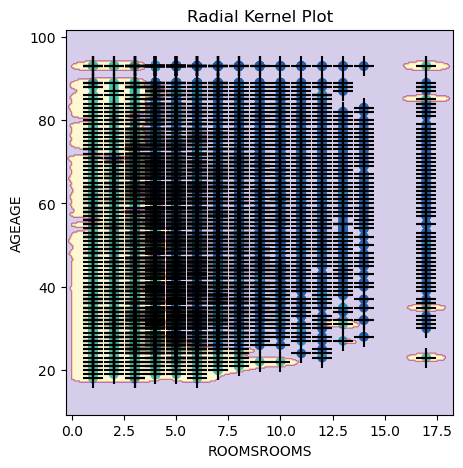

In [64]:
from ISLP.svm import plot as plot_svm
custom_features = ['ROOMS', 'AGE']
best_svc_rbf.fit(X_train[custom_features], y_train)

fig, ax = plt.subplots(figsize=(5, 5))
plot_svm(X_train[custom_features], y_train, best_svc_rbf, ax=ax)
plt.xlabel('ROOMS' + custom_features[0])
plt.ylabel('AGE' + custom_features[1])
plt.title('Radial Kernel Plot')
plt.show()

#### Polynomial Kernel

In [42]:
columns_to_keep = ['OWNERSHP', 'HHINCOME', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'AGE', 'isDivorced']
df_poly = df[columns_to_keep]
df_poly.columns

Index(['OWNERSHP', 'HHINCOME', 'VEHICLES', 'NFAMS', 'NCOUPLES', 'AGE',
       'isDivorced'],
      dtype='object')

In [43]:
X = df_poly.drop('OWNERSHP', axis=1)
y = df_poly['OWNERSHP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
svc_poly = SVC(kernel="poly", degree=2, C=1)
svc_poly.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

In [45]:
nsv = svc_poly.n_support_.sum()
print("Number of support vectors:", nsv)

Number of support vectors: 12570


In [46]:
y_train_pred = svc_poly.predict(X_train)
y_test_pred = svc_poly.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_error_rate = 1 - train_accuracy
test_error_rate = 1 - test_accuracy

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training error rate:", train_error_rate)
print("Testing error rate:", test_error_rate)

Training accuracy: 0.7796484393117202
Testing accuracy: 0.7824910723947625
Training error rate: 0.22035156068827977
Testing error rate: 0.21750892760523755


#### Cross Validation

In [47]:
param_grid = {
    'C': [1, 5, 10],
    'degree': [2, 4, 6],
}

svc_poly = SVC(kernel="poly")

grid_search_poly = GridSearchCV(estimator=svc_poly, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_poly.fit(X_train, y_train)

print("Best parameters (Poly):", grid_search_poly.best_params_)

Best parameters (Poly): {'C': 5, 'degree': 2}


In [48]:
best_svc_poly = grid_search_poly.best_estimator_
y_train_pred_poly_cv = best_svc_poly.predict(X_train)
y_test_pred_poly_cv = best_svc_poly.predict(X_test)

In [49]:
train_accuracy_poly_cv = accuracy_score(y_train, y_train_pred_poly_cv)
test_accuracy_poly_cv = accuracy_score(y_test, y_test_pred_poly_cv)

train_error_rate_poly_cv = 1 - train_accuracy_poly_cv
test_error_rate_poly_cv = 1 - test_accuracy_poly_cv

print("Training accuracy (Poly, CV):", train_accuracy_poly_cv)
print("Testing accuracy (Poly, CV):", test_accuracy_poly_cv)
print("Training error rate (Poly, CV):", train_error_rate_poly_cv)
print("Testing error rate (Poly, CV):", test_error_rate_poly_cv)

Training accuracy (Poly, CV): 0.7812253606047957
Testing accuracy (Poly, CV): 0.782599285791581
Training error rate (Poly, CV): 0.21877463939520425
Testing error rate (Poly, CV): 0.217400714208419


In [50]:
importance_poly = permutation_importance(best_svc_poly, X_test, y_test, n_jobs=-1)
importance_scores_poly = importance_poly.importances_mean
feature_names_poly = X.columns

sorted_indices_poly = importance_scores_poly.argsort()[::-1]
sorted_feature_names_poly = feature_names_poly[sorted_indices_poly]
sorted_importance_scores_poly = importance_scores_poly[sorted_indices_poly]

for feature_name, importance_score in zip(sorted_feature_names_poly, sorted_importance_scores_poly):
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")


Feature: AGE, Importance Score: 0.09150524834974569
Feature: VEHICLES, Importance Score: 0.03159831187100963
Feature: HHINCOME, Importance Score: 0.025603289687263286
Feature: NCOUPLES, Importance Score: 0.0076398658153879586
Feature: NFAMS, Importance Score: 0.002856833676009085
Feature: isDivorced, Importance Score: -0.0005843523428200381


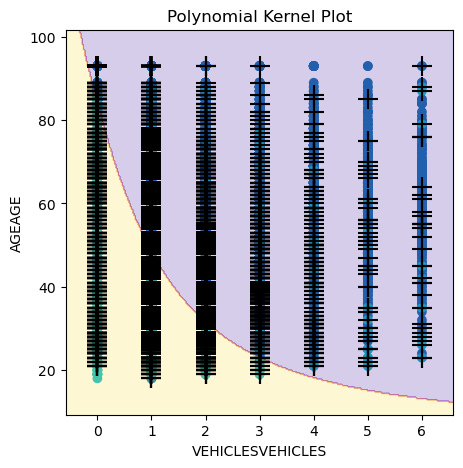

In [60]:
from ISLP.svm import plot as plot_svm
custom_features = ['VEHICLES', 'AGE']
best_svc_poly.fit(X_train[custom_features], y_train)

fig, ax = plt.subplots(figsize=(5, 5))
plot_svm(X_train[custom_features], y_train, best_svc_poly, ax=ax)
plt.xlabel('VEHICLES' + custom_features[0])
plt.ylabel('AGE' + custom_features[1])
plt.title('Polynomial Kernel Plot')
plt.show()